<a href="https://colab.research.google.com/github/KrzMa/strategy/blob/main/Implement__Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=46008f588276fae1b6f0e5191ba4b85b83823e0129e725f0de02e1f55293a911
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [6]:
import pandas as pd
import requests
import pandas_ta as ta
import matplotlib.pyplot as plt
from termcolor import colored as cl
import math

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')

In [12]:
def get_historical_data(symbol, start_date, interval):
    url = "https://api.benzinga.com/api/v2/bars"
    querystring = {"token":"Your Secret Key","symbols":f"{symbol}","from":f"{start_date}","interval":f"{interval}"}

    hist_json = requests.get(url, params = querystring).json()
    df = pd.DataFrame(hist_json[0]['candles'])

    return df

aapl = get_historical_data('AAPL', '1993-01-01', '1W')
aapl.tail()

,time,open,high,low,close,volume,dateTime
1621,1706486400000,192.010,192.2000,179.25,185.85,325909880,2024-01-29T15:00:00.000-05:00
1622,1707091200000,188.150,191.0500,185.84,188.85,252715800,2024-02-05T15:00:00.000-05:00
1623,1707696000000,188.415,188.6700,181.35,182.31,268128940,2024-02-12T15:00:00.000-05:00
1624,1708300800000,181.790,185.0400,180.00,182.52,192607110,2024-02-19T15:00:00.000-05:00
1625,1708905600000,182.240,183.9225,177.38,179.66,354385890,2024-02-26T15:00:00.000-05:00


In [13]:
aapl.head()

,time,open,high,low,close,volume,dateTime
0,726105600000,0.531250,0.562500,0.511161,0.555804,1189865600,1993-01-04T15:00:00.000-05:00
1,726710400000,0.553571,0.582589,0.535714,0.537946,2089964800,1993-01-11T15:00:00.000-05:00
2,727315200000,0.531250,0.540179,0.517857,0.531250,1097779200,1993-01-18T15:00:00.000-05:00
3,727920000000,0.529018,0.553571,0.524554,0.531250,1164654400,1993-01-25T15:00:00.000-05:00
4,728524800000,0.529018,0.549107,0.502232,0.511161,1262844800,1993-02-01T15:00:00.000-05:00


In [14]:
aapl[['dcl', 'dcm', 'dcu']] = aapl.ta.donchian(lower_length = 40, upper_length = 50)
aapl = aapl.dropna().drop('time', axis = 1).rename(columns = {'dateTime':'date'})
aapl = aapl.set_index('date')
aapl.index = pd.to_datetime(aapl.index)

aapl.tail()

,open,high,low,close,volume,dcl,dcm,dcu
date,,,,,,,,
2024-01-29 15:00:00-05:00,192.010,192.2000,179.25,185.85,325909880,164.31,181.965,199.62
2024-02-05 15:00:00-05:00,188.150,191.0500,185.84,188.85,252715800,165.67,182.645,199.62
2024-02-12 15:00:00-05:00,188.415,188.6700,181.35,182.31,268128940,165.67,182.645,199.62
2024-02-19 15:00:00-05:00,181.790,185.0400,180.00,182.52,192607110,165.67,182.645,199.62
2024-02-26 15:00:00-05:00,182.240,183.9225,177.38,179.66,354385890,165.67,182.645,199.62


Text(0, 0.5, 'Close')

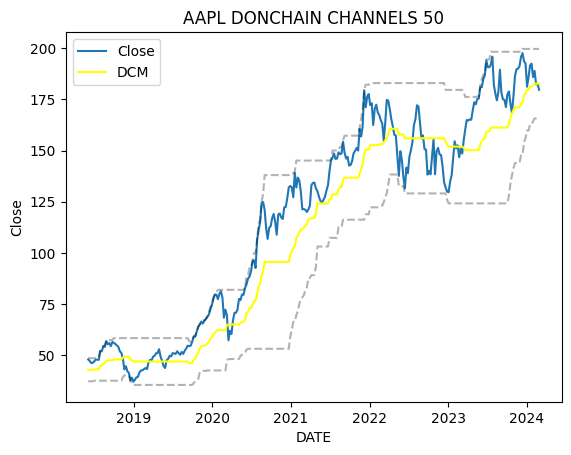

In [19]:
plt.plot(aapl[-300:].close, label = 'Close')
plt.plot(aapl[-300:].dcl, color = 'black', linestyle = '--', alpha = 0.3)
plt.plot(aapl[-300:].dcm, color = 'yellow', label='DCM')
plt.plot(aapl[-300:].dcu, color = 'black', linestyle='--', alpha=0.3)
plt.legend()
plt.title('AAPL DONCHAIN CHANNELS 50')
plt.xlabel('DATE')
plt.ylabel('Close')

In [20]:
def implement_strategy(aapl, investment):

    in_position = False
    equity = investment

    for i in range(3, len(aapl)):
        if aapl['high'][i] == aapl['dcu'][i] and in_position == False:
            no_of_shares = math.floor(equity/aapl.close[i])
            equity -= (no_of_shares * aapl.close[i])
            in_position = True
            print(cl('BUY: ', color = 'green', attrs = ['bold']), f'{no_of_shares} Shares are bought at ${aapl.close[i]} on {str(aapl.index[i])[:10]}')
        elif aapl['low'][i] == aapl['dcl'][i] and in_position == True:
            equity += (no_of_shares * aapl.close[i])
            in_position = False
            print(cl('SELL: ', color = 'red', attrs = ['bold']), f'{no_of_shares} Shares are bought at ${aapl.close[i]} on {str(aapl.index[i])[:10]}')
    if in_position == True:
        equity += (no_of_shares * aapl.close[i])
        print(cl(f'\nClosing position at {aapl.close[i]} on {str(aapl.index[i])[:10]}', attrs = ['bold']))
        in_position = False

    earning = round(equity - investment, 2)
    roi = round(earning / investment * 100, 2)
    print(cl(f'EARNING: ${earning} ; ROI: {roi}%', attrs = ['bold']))

implement_strategy(aapl, 100000)

BUY:  272340 Shares are bought at $0.3671875 on 1994-10-10
SELL:  272340 Shares are bought at $0.3214286 on 1995-10-09
BUY:  365659 Shares are bought at $0.2393975 on 1997-08-04
SELL:  365659 Shares are bought at $0.14508928 on 1997-12-29
BUY:  212688 Shares are bought at $0.2494422 on 1998-04-13
SELL:  212688 Shares are bought at $0.4598215 on 2000-09-25
BUY:  219244 Shares are bought at $0.4460715 on 2002-04-15
SELL:  219244 Shares are bought at $0.2671429 on 2002-07-15
BUY:  170827 Shares are bought at $0.3428571 on 2003-06-16
SELL:  170827 Shares are bought at $3.466786 on 2008-09-29
BUY:  97991 Shares are bought at $6.043571 on 2009-08-17
SELL:  97991 Shares are bought at $18.206929 on 2012-12-10
BUY:  89836 Shares are bought at $19.859643 on 2013-11-25
SELL:  89836 Shares are bought at $28.3225 on 2015-08-24
BUY:  85496 Shares are bought at $29.76 on 2017-01-09
SELL:  85496 Shares are bought at $37.6825 on 2018-12-17
BUY:  56768 Shares are bought at $56.7525 on 2019-09-30
SELL:  

In [21]:
spy = get_historical_data('SPY', '1993-01-01', '1W')
spy_ret = round(((spy.close.iloc[-1] - spy.close.iloc[0]) /
                 spy.close.iloc[0]) * 100)

print(cl('SPY ETF buy/hold return: ', attrs=['bold']), f'{spy_ret}%')

SPY ETF buy/hold return:  1067%
